# <center> WELCOME!</center>

<center><img src="foto.jpg" height=500 width=1000/></center>

## Content

1. [Import Libraries and Load Data](#1)

- Import Modules, Load Discover the Data

2. [Data Preparation, Train and Test Data](#2)

- Train and Test Split

3. [Feature Scaling](#3)

- MinMaxScaller
- Create Data Set

4. [RNN-Modelling](#4)

- Reshaping and Transforming

5. [Visualizing of RNN](#5)

- Show Real and Predict Data


<a id="1"></a>
## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("google_stock_price.csv")

In [3]:
df

,Date,Close/Last,Volume,Open,High,Low
0,05/25/2022,$2116.79,1894967,$2102.84,$2130.8938,$2084.225
1,05/24/2022,$2118.52,3019319,$2127.55,$2127.9,$2044.16
2,05/23/2022,$2233.33,1577911,$2202.08,$2240.11,$2183.085
3,05/20/2022,$2186.26,1879301,$2241.71,$2251,$2127.46
4,05/19/2022,$2214.91,1459587,$2236.82,$2271.75,$2209.36
...,...,...,...,...,...,...
2052,04/02/2014,$567,146697,$599.99,$604.83,$562.19
2053,04/01/2014,$567.16,7932,$558.71,$568.45,$558.71
2054,03/31/2014,$556.97,10772,$566.89,$567,$556.93
2055,03/28/2014,$559.99,41003,$561.2,$566.43,$558.67


In [4]:
df=df.sort_index(axis = 0, ascending=False)
df=df.reset_index()
df=df.drop(labels="index", axis=1)

In [5]:
df["Close/Last"] = df["Close/Last"].str.replace("$","")
df["Open"] = df["Open"].str.replace("$","")
df["High"] = df["High"].str.replace("$","")
df["Low"] = df["Low"].str.replace("$","")

In [6]:
df

,Date,Close/Last,Volume,Open,High,Low
0,03/27/2014,558.46,13052,568,568,552.92
1,03/28/2014,559.99,41003,561.2,566.43,558.67
2,03/31/2014,556.97,10772,566.89,567,556.93
3,04/01/2014,567.16,7932,558.71,568.45,558.71
4,04/02/2014,567,146697,599.99,604.83,562.19
...,...,...,...,...,...,...
2052,05/19/2022,2214.91,1459587,2236.82,2271.75,2209.36
2053,05/20/2022,2186.26,1879301,2241.71,2251,2127.46
2054,05/23/2022,2233.33,1577911,2202.08,2240.11,2183.085
2055,05/24/2022,2118.52,3019319,2127.55,2127.9,2044.16


In [7]:
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

<a id="2"></a>
## Data Preparation, Train and Test Data

In [8]:
#Datayi Train ve Test olarak bölüyoruz iki sekilde bölebiliriz.
train = df.loc[:len(df)-201,["Open"]] 
test = df.loc[len(train):,["Open"]]
##Ya da ...
##import pandas
##import sklearn
##import sklearn.model_selection
##from sklearn.model_selection import train_test_split
##train, test = sklearn.model_selection.train_test_split(df, train_size = 0.903)

In [9]:
train.tail()

,Open
1852,2724.99
1853,2720.57
1854,2725.9
1855,2738.98
1856,2761.59


In [10]:
test.head()

,Open
1857,2765.66
1858,2754.26
1859,2767.15
1860,2760
1861,2763.82


In [11]:
train.shape

(1857, 1)

In [12]:
test.shape

(200, 1)

In [13]:
train=train.astype("float")
train

,Open
0,568.00
1,561.20
2,566.89
3,558.71
4,599.99
...,...
1852,2724.99
1853,2720.57
1854,2725.90
1855,2738.98


In [14]:
test=test.astype("float")
test

,Open
1857,2765.66
1858,2754.26
1859,2767.15
1860,2760.00
1861,2763.82
...,...
2052,2236.82
2053,2241.71
2054,2202.08
2055,2127.55


<a id="3"></a>
## Feature Scaling

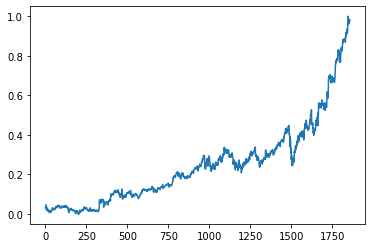

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

plt.plot(train_scaled)
plt.show()

In [16]:
def create_dataset(train, time_step):
    X_train, y_train = [], []
    
    for i in range(time_step, train.shape[0]):
        X_train.append(train_scaled[i - time_step:i, 0])
        y_train.append(train_scaled[i, 0])

    return np.array(X_train), np.array(y_train)

In [17]:
#Taking data for past 20 days for next prediction
time_step = 20

X_train, y_train = create_dataset(train, time_step)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
X_train.shape

(1837, 20, 1)

<a id="4"></a>
## RNN-Modelling

In [19]:
# Importing the Keras libraries

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout
 
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
58/58 [==============================] - 4s 14ms/step - loss: 0.2627
Epoch 2/200
58/58 [==============================] - 1s 14ms/step - loss: 0.1186
Epoch 3/200
58/58 [==============================] - 1s 14ms/step - loss: 0.0612
Epoch 4/200
58/58 [==============================] - 1s 13ms/step - loss: 0.0405
Epoch 5/200
58/58 [==============================] - 1s 13ms/step - loss: 0.0306
Epoch 6/200
58/58 [==============================] - 1s 13ms/step - loss: 0.0249
Epoch 7/200
58/58 [==============================] - 1s 14ms/step - loss: 0.0183
Epoch 8/200
58/58 [==============================] - 1s 14ms/step - loss: 0.0155
Epoch 9/200
58/58 [==============================] - 1s 14ms/step - loss: 0.0127
Epoch 10/200
58/58 [==============================] - 1s 13ms/step - loss: 0.0104
Epoch 11/200
58/58 [==============================] - 1s 14ms/step - loss: 0.0086
Epoch 12/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0068
Epoch 13/200
58/58 [=====

58/58 [==============================] - 1s 13ms/step - loss: 8.8101e-04
Epoch 100/200
58/58 [==============================] - 1s 14ms/step - loss: 8.5173e-04
Epoch 101/200
58/58 [==============================] - 1s 13ms/step - loss: 9.1825e-04
Epoch 102/200
58/58 [==============================] - 1s 13ms/step - loss: 8.6313e-04
Epoch 103/200
58/58 [==============================] - 1s 13ms/step - loss: 8.1943e-04
Epoch 104/200
58/58 [==============================] - 1s 13ms/step - loss: 8.3806e-04
Epoch 105/200
58/58 [==============================] - 1s 13ms/step - loss: 7.4031e-04
Epoch 106/200
58/58 [==============================] - 1s 13ms/step - loss: 7.8568e-04
Epoch 107/200
58/58 [==============================] - 1s 13ms/step - loss: 8.8964e-04
Epoch 108/200
58/58 [==============================] - 1s 14ms/step - loss: 8.2385e-04
Epoch 109/200
58/58 [==============================] - 1s 14ms/step - loss: 7.1709e-04
Epoch 110/200
58/58 [==============================] - 1s

58/58 [==============================] - 1s 13ms/step - loss: 7.5442e-04
Epoch 194/200
58/58 [==============================] - 1s 13ms/step - loss: 8.2528e-04
Epoch 195/200
58/58 [==============================] - 1s 13ms/step - loss: 6.4302e-04
Epoch 196/200
58/58 [==============================] - 1s 13ms/step - loss: 7.3898e-04
Epoch 197/200
58/58 [==============================] - 1s 13ms/step - loss: 6.8692e-04
Epoch 198/200
58/58 [==============================] - 1s 12ms/step - loss: 8.9873e-04
Epoch 199/200
58/58 [==============================] - 1s 13ms/step - loss: 8.4624e-04
Epoch 200/200
58/58 [==============================] - 1s 12ms/step - loss: 6.8171e-04


In [20]:
df_open = df.loc[:, ["Open"]]
inputs = df_open[len(df_open) - len(test) - time_step:].values.reshape(-1 ,1)
inputs = scaler.transform(inputs)
inputs

array([[0.92965297],
       [0.93484475],
       [0.92739323],
       [0.92318169],
       [0.91319283],
       [0.91998508],
       [0.93614594],
       [0.95878676],
       [0.98472395],
       [1.        ],
       [0.98743044],
       [0.96850757],
       [0.9609641 ],
       [0.96073422],
       [0.965206  ],
       [0.96737032],
       [0.96545323],
       [0.96776502],
       [0.97343824],
       [0.98324492],
       [0.98501021],
       [0.98006567],
       [0.98565648],
       [0.98255529],
       [0.98421215],
       [0.97488257],
       [0.96058675],
       [0.97460064],
       [0.99121692],
       [1.01329389],
       [1.02491358],
       [1.02261914],
       [1.01822977],
       [1.04071444],
       [1.05095052],
       [1.04891632],
       [1.05151438],
       [1.03586965],
       [1.0411048 ],
       [1.04669127],
       [1.04226721],
       [1.04712501],
       [1.02767212],
       [1.03599977],
       [1.03251257],
       [1.04432743],
       [1.03285522],
       [0.991

In [21]:
inputs.shape

(220, 1)

In [22]:
X_test=[]
for i in range(time_step, inputs.shape[0]):
    X_test.append(inputs[i-time_step:i,0]) # 0 dan 20 ye, 1 den 21 e gibi kaydirarark 20 eleman aliyoruz 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # Dimension of array is 3.

In [23]:
X_test.shape

(200, 20, 1)

<a id="5"></a>
## Visualizing of RNN

In [24]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

7/7 [==============================] - 1s 5ms/step


In [25]:
predicted_data

array([[2854.0886],
       [2858.5647],
       [2850.8608],
       [2857.8972],
       [2854.3596],
       [2861.2668],
       [2849.0422],
       [2827.92  ],
       [2849.7246],
       [2878.413 ],
       [2913.4387],
       [2925.5854],
       [2919.03  ],
       [2910.9575],
       [2943.694 ],
       [2966.9355],
       [2964.4873],
       [2967.1929],
       [2942.8608],
       [2952.399 ],
       [2964.339 ],
       [2957.9487],
       [2963.869 ],
       [2932.901 ],
       [2945.1228],
       [2939.5698],
       [2959.2515],
       [2943.8987],
       [2878.6794],
       [2894.4238],
       [2895.1091],
       [2925.855 ],
       [2913.0393],
       [2916.527 ],
       [2888.8577],
       [2856.8914],
       [2826.891 ],
       [2807.4924],
       [2843.0693],
       [2823.112 ],
       [2823.4646],
       [2878.3123],
       [2892.032 ],
       [2894.8887],
       [2882.1538],
       [2863.5327],
       [2894.0264],
       [2923.6035],
       [2915.3118],
       [2935.518 ],


In [26]:
predicted_data.shape

(200, 1)

In [27]:
real_value = test.values
real_value

array([[2765.66 ],
       [2754.26 ],
       [2767.15 ],
       [2760.   ],
       [2763.82 ],
       [2742.31 ],
       [2709.35 ],
       [2741.66 ],
       [2779.97 ],
       [2830.87 ],
       [2857.66 ],
       [2852.37 ],
       [2842.25 ],
       [2894.09 ],
       [2917.69 ],
       [2913.   ],
       [2918.99 ],
       [2882.92 ],
       [2894.99 ],
       [2907.87 ],
       [2897.67 ],
       [2908.87 ],
       [2864.02 ],
       [2883.22 ],
       [2875.18 ],
       [2902.42 ],
       [2875.97 ],
       [2780.004],
       [2802.34 ],
       [2801.01 ],
       [2832.19 ],
       [2818.92 ],
       [2831.71 ],
       [2781.77 ],
       [2742.194],
       [2686.5  ],
       [2671.09 ],
       [2713.99 ],
       [2680.   ],
       [2692.51 ],
       [2777.26 ],
       [2798.12 ],
       [2796.   ],
       [2792.75 ],
       [2755.   ],
       [2799.04 ],
       [2844.   ],
       [2824.27 ],
       [2865.83 ],
       [2884.45 ],
       [2843.84 ],
       [2807.02 ],
       [2776

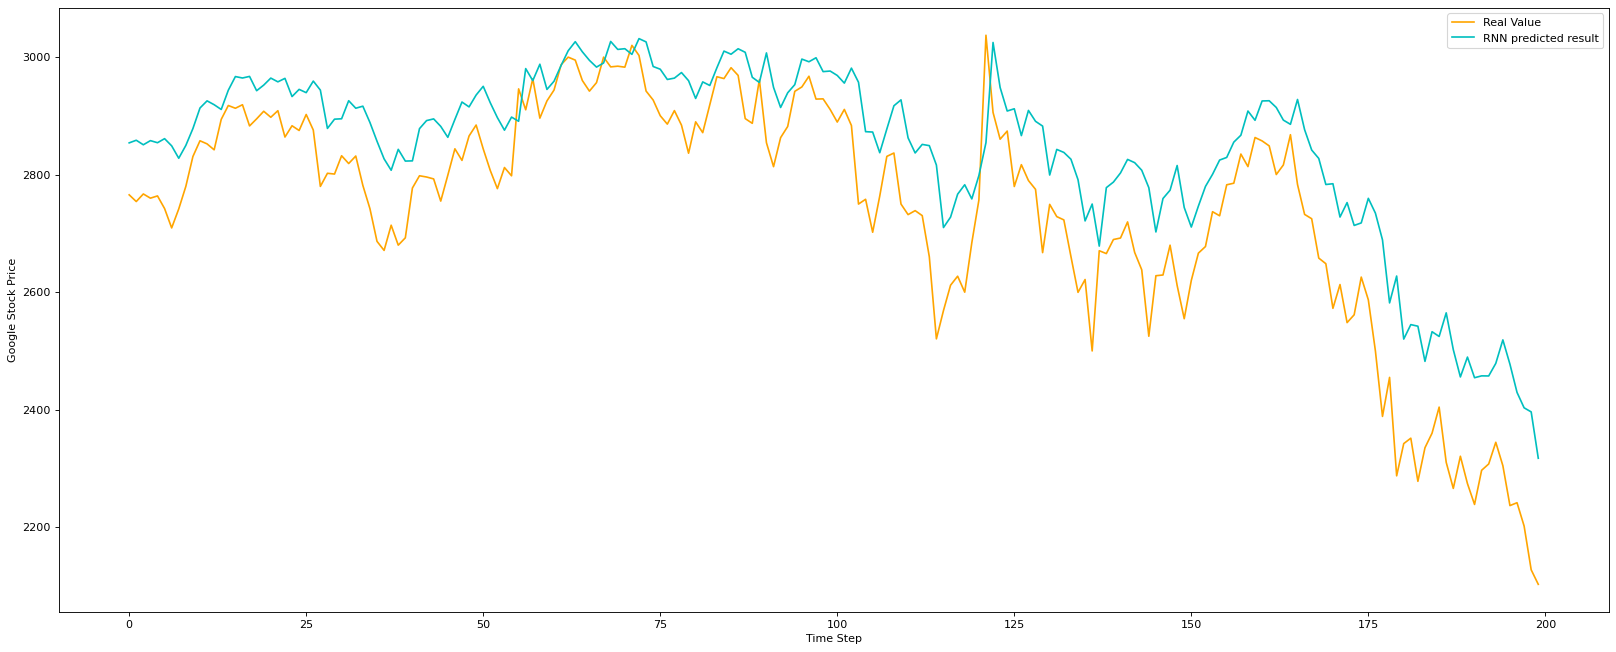

In [28]:
plt.figure(figsize=(25,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.plot(real_value, color = "orange", label = "Real Value")
plt.plot(predicted_data, color = "c", label = "RNN predicted result")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Google Stock Price")
plt.show()